## ANÁLISE DESCRITIVA – SIM | CID I219
**Autor**: Vitor Amadeu 
**Objetivo**: Análise exploratória e preparação para modelos e dashboard

# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga do dataset SIM – I219

In [2]:
dataset = pd.read_csv(
    'D:/Analise_de_dados_SIM/Data/raw/dataset_I219.csv',
    sep=',',
    encoding='latin1',
    low_memory=False,
    on_bad_lines='warn'
)

In [3]:
dataset.head()

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,DTNASC,IDADE,SEXO,RACACOR,...,VERSAOSIST,VERSAOSCB,ATESTADO,NUDIASOBCO,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,FONTESINF,ALTCAUSA
0,2.0,1,2,6082010,1300,812.0,20011912.0,498.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26.0,1,2,14042010,1741,813.0,21041939.0,470.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27.0,1,2,4052010,0930,812.0,16041963.0,447.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.0,1,2,24052010,0815,NaN,31011977.0,433.0,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41.0,1,2,23012010,NaN,812.0,13111945.0,464.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(1144980, 93)

In [6]:
dataset.columns

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO', 'PARTO',
       'OBITOPARTO', 'PESO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE',
       'FONTEINV', 'DTRECEBIM', 'UFINFORM', 'CB_PRE', 'MORTEPARTO', 'DTCADINF',
       'TPOBITOCOR', 'DTCADINV', 'COMUNSVOIM', 'DTRECORIG', 'DTRECORIGA',
       'CAUSAMAT', 'ESC2010', 'ESCMAE2010', 'STDOEPIDEM', 'STDONOVA',
       'CODMUNCART', 'NUMREGCART', 'DTREGCART', 'SERIESCFAL', 'ESCMAEAGR1',
       'ESCFALAGR1', 'SERIESCMAE', 'SEMAGESTAC', 'TPMORTEOCO', 'EXPDIFDATA',
       'DIFDATA', 'D

# Limpeza inicial

In [7]:
# Verificar duplicados
dataset.duplicated().sum()

np.int64(0)

In [8]:
# Seleção das colunas principais
colunas_base = [
    'TIPOBITO', 'IDADE', 'SEXO',
    'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
    'CAUSABAS', 'CAUSABAS_O',
    'RACACOR', 'ESC', 'ATESTADO',
    'DTOBITO', 'CODMUNRES', 'CODMUNOCOR'
]

dataset_filtrado = dataset[colunas_base].copy()

In [9]:
dataset_filtrado.head()

,TIPOBITO,IDADE,SEXO,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,CAUSABAS_O,RACACOR,ESC,ATESTADO,DTOBITO,CODMUNRES,CODMUNOCOR
0,2,498.0,1,*I469,*I219,NaN,NaN,NaN,I219,R98,NaN,2.0,NaN,6082010,120040,120040
1,2,470.0,1,*I219,NaN,NaN,NaN,NaN,I219,I219,NaN,NaN,NaN,14042010,120045,120045
2,2,447.0,1,*I219,*I200,*I516,NaN,NaN,I219,I219,NaN,NaN,NaN,4052010,120045,120045
3,2,433.0,1,*I219,NaN,NaN,NaN,NaN,I219,I219,4.0,3.0,NaN,24052010,120040,120040
4,2,464.0,1,*I219,NaN,NaN,NaN,NaN,I219,R98,NaN,NaN,NaN,23012010,120040,120040


# Tratamento da variável IDADE

In [10]:
def transformar_idade(codigo):
    if pd.isna(codigo):
        return np.nan
    
    codigo = str(int(codigo)).zfill(3)
    unidade = int(codigo[0])
    quantidade = int(codigo[1:])

    if unidade == 0:
        return quantidade / (60 * 24 * 365)
    elif unidade == 1:
        return quantidade / (24 * 365)
    elif unidade == 2:
        return quantidade / 365
    elif unidade == 3:
        return quantidade / 12
    elif unidade == 4:
        return quantidade
    elif unidade == 5:
        return 100 + quantidade
    else:
        return np.nan


In [11]:
dataset_filtrado['idade_real'] = dataset_filtrado['IDADE'].apply(transformar_idade)

In [12]:
dataset_filtrado.drop(columns=['IDADE'], inplace=True)

# Tratamento da data de óbito

In [13]:
def separar_data(data):
    data = str(data).zfill(8)
    return pd.Series({
        'DIA_OBITO': data[:2],
        'MES_OBITO': data[2:4],
        'ANO_OBITO': data[4:]
    })


In [14]:
dataset_filtrado = pd.concat(
    [dataset_filtrado, dataset_filtrado['DTOBITO'].apply(separar_data)],
    axis=1
)


# Tratamento geográfico – Estado

In [15]:
ufs = {
    "11":"Rondônia","12":"Acre","13":"Amazonas","14":"Roraima",
    "15":"Pará","16":"Amapá","17":"Tocantins","21":"Maranhão",
    "22":"Piauí","23":"Ceará","24":"Rio Grande do Norte",
    "25":"Paraíba","26":"Pernambuco","27":"Alagoas",
    "28":"Sergipe","29":"Bahia","31":"Minas Gerais",
    "32":"Espírito Santo","33":"Rio de Janeiro",
    "35":"São Paulo","41":"Paraná","42":"Santa Catarina",
    "43":"Rio Grande do Sul","50":"Mato Grosso do Sul",
    "51":"Mato Grosso","52":"Goiás","53":"Distrito Federal"
}


In [16]:
dataset_filtrado['Estado'] = dataset_filtrado['CODMUNOCOR'].astype(str).str[:2].map(ufs)

# Criação das variáveis indicadoras (CID)

In [17]:
def verificar_cid(row, lista_cids):
    for col in ['LINHAA','LINHAB','LINHAC','LINHAD','LINHAII','CAUSABAS_O']:
        if pd.notna(row[col]):
            for cid in lista_cids:
                if cid in row[col]:
                    return 1
    return 0

In [18]:
cids_obesidade = ["E66","E660","E661","E662","E668","E669"]
cids_hipertensao = ["I10X"]
cids_diabetes = ["E149"]
cids_tabaco = ["F172","F171","F179"]

In [19]:
dataset_filtrado['obesidade'] = dataset_filtrado.apply(verificar_cid, axis=1, lista_cids=cids_obesidade)
dataset_filtrado['hipertensao'] = dataset_filtrado.apply(verificar_cid, axis=1, lista_cids=cids_hipertensao)
dataset_filtrado['diabetes'] = dataset_filtrado.apply(verificar_cid, axis=1, lista_cids=cids_diabetes)
dataset_filtrado['tmTabaco'] = dataset_filtrado.apply(verificar_cid, axis=1, lista_cids=cids_tabaco)


# Dataset final para análise

In [20]:
dataset_final = dataset_filtrado.drop(columns=[
    'LINHAA','LINHAB','LINHAC','LINHAD','LINHAII',
    'CAUSABAS_O','DTOBITO','CODMUNRES','CODMUNOCOR','ATESTADO'
])

dataset_final.head()


,TIPOBITO,SEXO,CAUSABAS,RACACOR,ESC,idade_real,DIA_OBITO,MES_OBITO,ANO_OBITO,Estado,obesidade,hipertensao,diabetes,tmTabaco
0,2,1,I219,NaN,2.0,98.0,06,08,2010,Acre,0,0,0,0
1,2,1,I219,NaN,NaN,70.0,14,04,2010,Acre,0,0,0,0
2,2,1,I219,NaN,NaN,47.0,04,05,2010,Acre,0,0,0,0
3,2,1,I219,4.0,3.0,33.0,24,05,2010,Acre,0,0,0,0
4,2,1,I219,NaN,NaN,64.0,23,01,2010,Acre,0,0,0,0


# Estatísticas descritivas

In [21]:
dataset_final['idade_real'].describe()

count    1.143873e+06
mean     6.916525e+01
std      1.459436e+01
min      4.756469e-05
25%      5.900000e+01
50%      7.000000e+01
75%      8.000000e+01
max      1.200000e+02
Name: idade_real, dtype: float64

In [22]:
print("Desvio padrão:", dataset_final['idade_real'].std())
print("Variância:", dataset_final['idade_real'].var())

Desvio padrão: 14.594359916797956
Variância: 212.99534138103883


# Visualizações

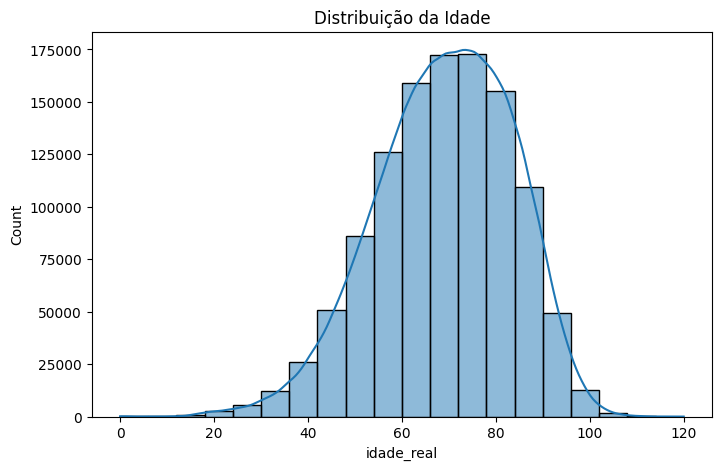

In [23]:
### Distribuição de idade
plt.figure(figsize=(8,5))
sns.histplot(dataset_final['idade_real'], bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.show()


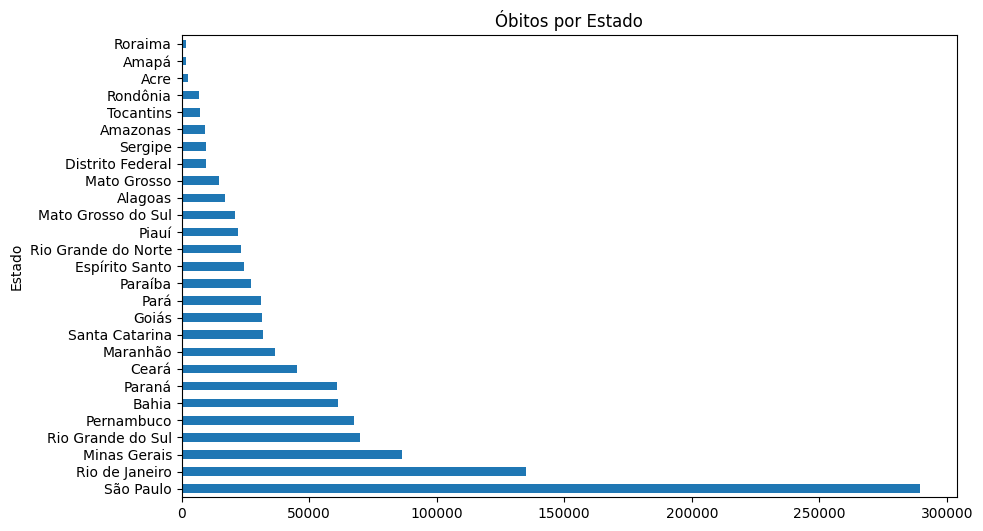

In [24]:
### Óbitos por estado
plt.figure(figsize=(10,6))
dataset_final['Estado'].value_counts().plot(kind='barh')
plt.title('Óbitos por Estado')
plt.show()

## População por 100 mil habitantes

In [29]:
populacao = pd.read_excel(
    "D:/Analise_de_dados_SIM/Data/raw/População_Estadual_2010-2021.xlsx"
)

populacao.head()

,Unidade da Federação,Masculino,Feminino,Total,ano
0,11 Rondônia,814371,784263,1598634,2010
1,12 Acre,384406,380919,765325,2010
2,13 Amazonas,1789736,1763412,3553148,2010
3,14 Roraima,233153,225667,458820,2010
4,15 Pará,3915560,3847393,7762953,2010


In [30]:
# Separar código e nome do estado
populacao[['Codigo_Estado', 'Estado']] = (
    populacao['Unidade da Federação']
    .str.split(' ', n=1, expand=True)
)

# Limpeza básica
populacao = populacao.drop(columns=['Unidade da Federação'])
populacao.columns = populacao.columns.str.strip()
populacao['ano'] = populacao['ano'].astype(int)

populacao.head()

,Masculino,Feminino,Total,ano,Codigo_Estado,Estado
0,814371,784263,1598634,2010,11,Rondônia
1,384406,380919,765325,2010,12,Acre
2,1789736,1763412,3553148,2010,13,Amazonas
3,233153,225667,458820,2010,14,Roraima
4,3915560,3847393,7762953,2010,15,Pará


In [32]:
dataset_final['ANO_OBITO'] = dataset_final['ANO_OBITO'].astype(int)

In [34]:
dados_combinados = pd.merge(
    dataset_final,
    populacao,
    left_on=['ANO_OBITO', 'Estado'],
    right_on=['ano', 'Estado'],
    how='inner'
)

dados_combinados.head()

,TIPOBITO,SEXO,CAUSABAS,RACACOR,ESC,idade_real,DIA_OBITO,MES_OBITO,ANO_OBITO,Estado,obesidade,hipertensao,diabetes,tmTabaco,Masculino,Feminino,Total,ano,Codigo_Estado
0,2,1,I219,NaN,2.0,98.0,06,08,2010,Acre,0,0,0,0,384406,380919,765325,2010,12
1,2,1,I219,NaN,NaN,70.0,14,04,2010,Acre,0,0,0,0,384406,380919,765325,2010,12
2,2,1,I219,NaN,NaN,47.0,04,05,2010,Acre,0,0,0,0,384406,380919,765325,2010,12
3,2,1,I219,4.0,3.0,33.0,24,05,2010,Acre,0,0,0,0,384406,380919,765325,2010,12
4,2,1,I219,NaN,NaN,64.0,23,01,2010,Acre,0,0,0,0,384406,380919,765325,2010,12


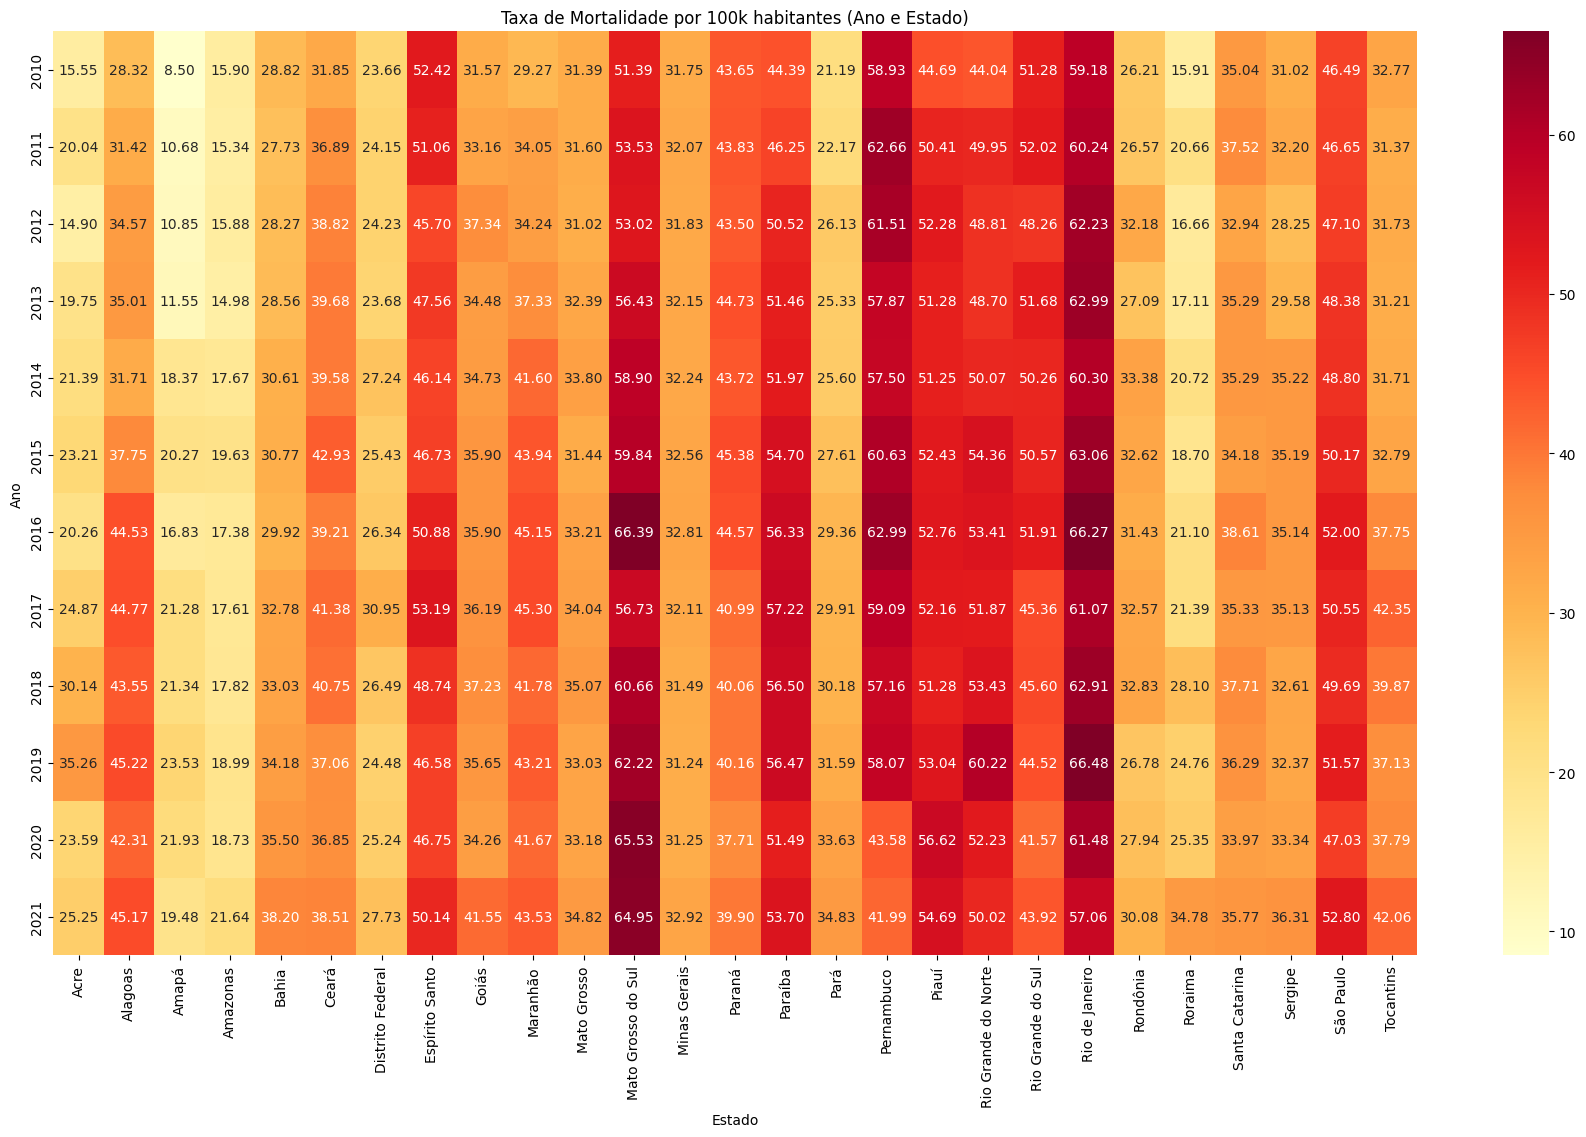

In [38]:
# Agrupar por ano e estado e contar o número de óbitos
mortalidade_ano_estado = dados_combinados.groupby(['ANO_OBITO', 'Estado']).size()

# Obter a população total por estado (assumindo que 'População Total Estado' representa isso)
populacao_estado = dados_combinados.groupby(['ANO_OBITO', 'Estado'])['Total'].first()

# Calcular a taxa de mortalidade por 100k habitantes
mortalidade_por_100k = (mortalidade_ano_estado / populacao_estado) * 100000

# Converter para DataFrame para facilitar a manipulação
mortalidade_por_100k = mortalidade_por_100k.unstack()

# Visualizar os dados
plt.figure(figsize=(22, 12))
sns.heatmap(mortalidade_por_100k, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title("Taxa de Mortalidade por 100k habitantes (Ano e Estado)")
plt.xlabel("Estado")
plt.ylabel("Ano")
plt.show()



# Export Dataset

In [40]:
dataset_final.to_csv('D:/Analise_de_dados_SIM/Data/processed/dataset_I219_analise_descritiva.csv', index=False)

  
